In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math

In [33]:
import sys
import datagnome as dgnom
#from importlib import reload
#reload(dgnom)

# Workflow
1. Data import
1. Analyse the problem
1. Data pre-processing
1. Data cleaning
    1. Inspection
    1. Check for inconsistent or invalid data
        1. Value constraints and set membership
        1. Formating
        1. Dtypes
        1. Cross field validation
        1. Check rows for validity
    1. Handle null values
    1. Handle duplicates
    1. Handle outliers
1. Data post-processing
1. EDA

# Data import

In [14]:
path = "data/mushrooms.csv"
df = pd.read_csv(path)

# Data cleaning
## Inspection

__Notes regarding data__
- Class is the target variable and contain two categories: p (poisonous) and e (edible)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [13]:
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [12]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
#df.head()
#df.tail(5)
#df.info()
#df.describe(include="O")
#df["align"].value_counts()

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

In [15]:
sns.countplot(data=df, x=i, ax=ax, hue=False)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


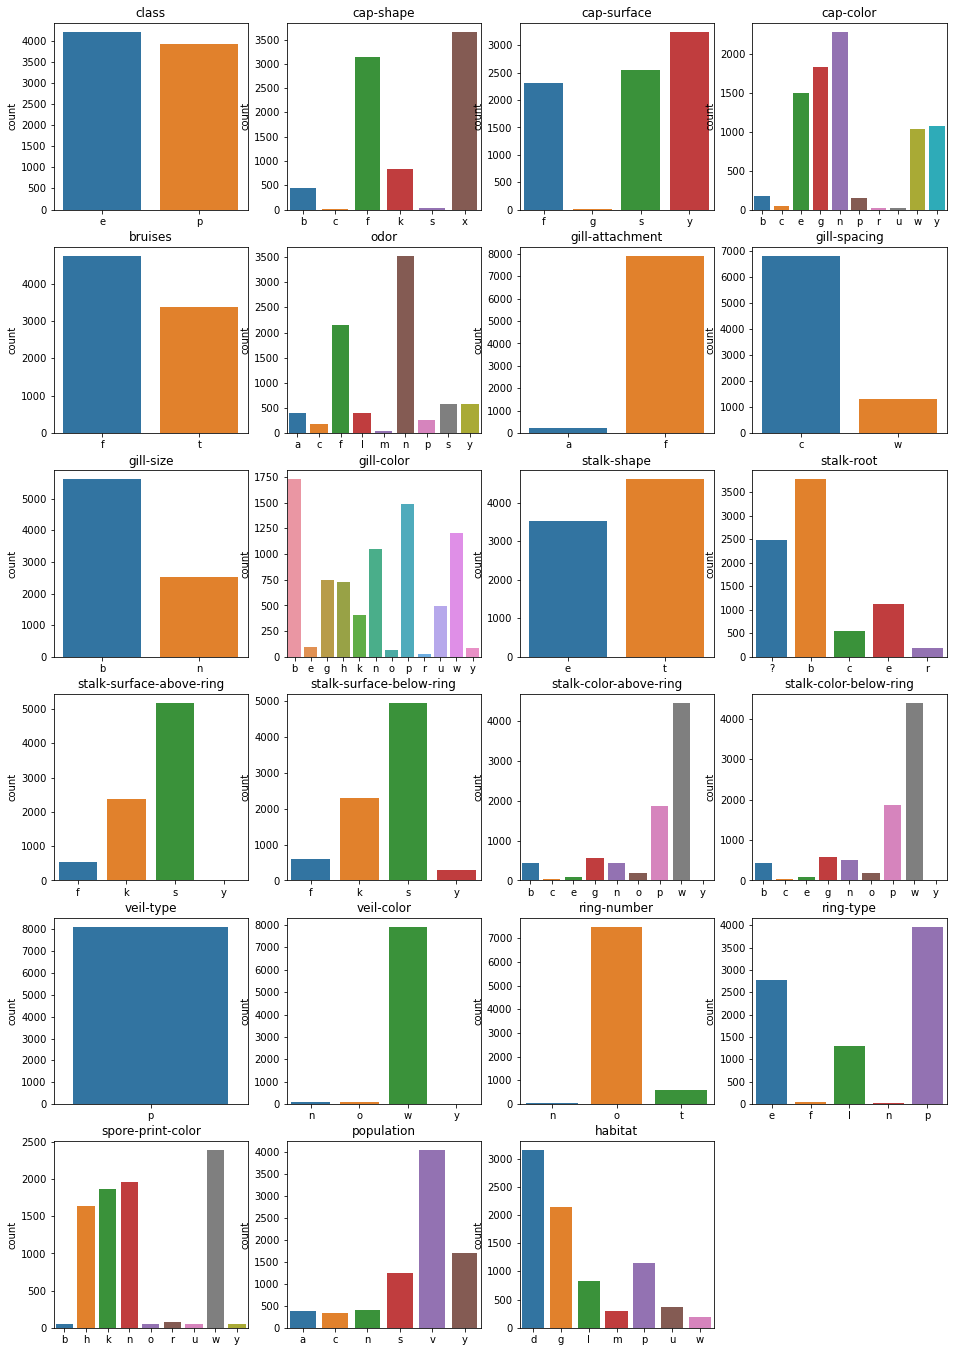

In [34]:
num_feat, cont_feat, disc_feat, cat_feat = dgnom.create_feature_lists(df)
dgnom.df_cobahiscplots(df,cat_feat,pltyp="countplot",target=False,hue=None,logs=False,kde=True,est=False,stat="density")

## Check for inconsistent or invalid data
__Summary of results__
- Only two categories in the target feature (class) - ok
- Dtypes ok as is
- No need for cross field or cross row validation
- Neither missing values nor duplicates
- Some features have catogories with very few data points - migth cause problems ith the train-test split. 

In [45]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Value constraints and set membership

### Check formating

### Change Dtypes

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Cross field validation

### Check rows for validity

In [8]:
# Count values
df["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

## Handle null values
(Or leave for next step)

In [9]:
df.isna() # Show which cells are empty
df.isna().sum(axis=0)  # Sum  
#df["time"].isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
import missingno as msno
g = msno.matrix(df)

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.notna())
plt.show()

## Handle duplicates

In [7]:
dr = df.duplicated(keep="first").sum() # All columns included in check

if dr>0:
    print(f"The dataset has {dr} duplicated rows.")
    print(f"Removing all duplicates will reduce the dataset from {df.shape[0]} to {df.shape[0]-dr} rows")
    print(df[df.duplicated()])
else:
    print("The dataset has 0 duplicated rows")
    
print("\n")
for c in df.columns:
    dup = df[c].duplicated().sum()
    if dup > 0:
        print(f"Columns {c} has {dup} duplicated rows")

if dr>0:
    print("Duplicated rows:")
    df.loc[df.duplicated(keep=False)]

The dataset has 0 duplicated rows


Columns class has 8122 duplicated rows
Columns cap-shape has 8118 duplicated rows
Columns cap-surface has 8120 duplicated rows
Columns cap-color has 8114 duplicated rows
Columns bruises has 8122 duplicated rows
Columns odor has 8115 duplicated rows
Columns gill-attachment has 8122 duplicated rows
Columns gill-spacing has 8122 duplicated rows
Columns gill-size has 8122 duplicated rows
Columns gill-color has 8112 duplicated rows
Columns stalk-shape has 8122 duplicated rows
Columns stalk-root has 8119 duplicated rows
Columns stalk-surface-above-ring has 8120 duplicated rows
Columns stalk-surface-below-ring has 8120 duplicated rows
Columns stalk-color-above-ring has 8115 duplicated rows
Columns stalk-color-below-ring has 8115 duplicated rows
Columns veil-type has 8123 duplicated rows
Columns veil-color has 8120 duplicated rows
Columns ring-number has 8121 duplicated rows
Columns ring-type has 8119 duplicated rows
Columns spore-print-color has 8115 duplic

## Handle outliers

# Data post-processing

__Summary of results__
- Data is well balances

In [10]:
# Check balance
target = "class"
df[target].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

In [11]:
# Reseet index
df.reset_index(drop=True,inplace=True)

# EDA
1. Description
1. Evaluate interdependence between columns
1. Correlation between columns

In [7]:
def amplt(df,var_list,xvar,kolm = 3):
    """Plot categorys"""
    rows = math.ceil(len(var_list)/kolm)
    fig, axs = plt.subplots(rows, kolm, figsize=(20,5*rows))

    for i, ax in zip(var_list,axs.flat):
        g = sns.barplot(data=df,x=xvar,y=i,ax=ax)
        ax.set(xlabel="",ylabel="",title=i)
        
    for i in axs.flat[::-1][:rows*3-len(var_list)]:
        i.set_axis_off()
    plt.show()

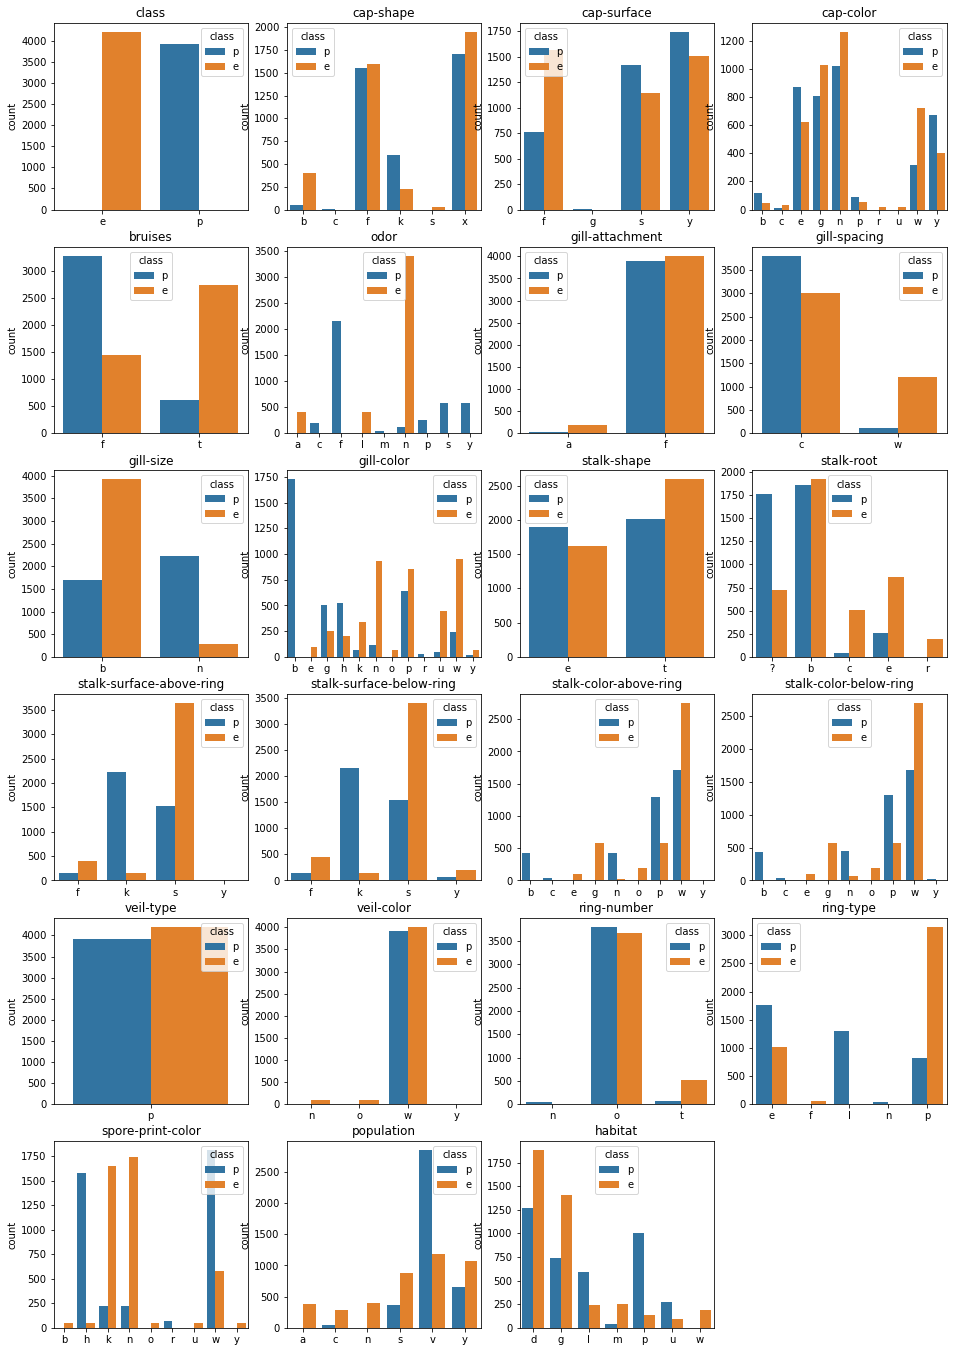

In [35]:
num_feat, cont_feat, disc_feat, cat_feat = dgnom.create_feature_lists(df)
dgnom.df_cobahiscplots(df,cat_feat,pltyp="countplot",target="class",hue="class",logs=False,kde=True,est=False,stat="density")

In [21]:
dgnom.df_flexplot(df)

interactive(children=(IntSlider(value=6, description='dx', max=15, min=3), IntSlider(value=5, description='dy'…

<Figure size 432x360 with 0 Axes>

C:\Users\ander\anaconda3\envs\kursenv\lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable veil-type for analysis 1. Dropping this column
  warnings.warn(


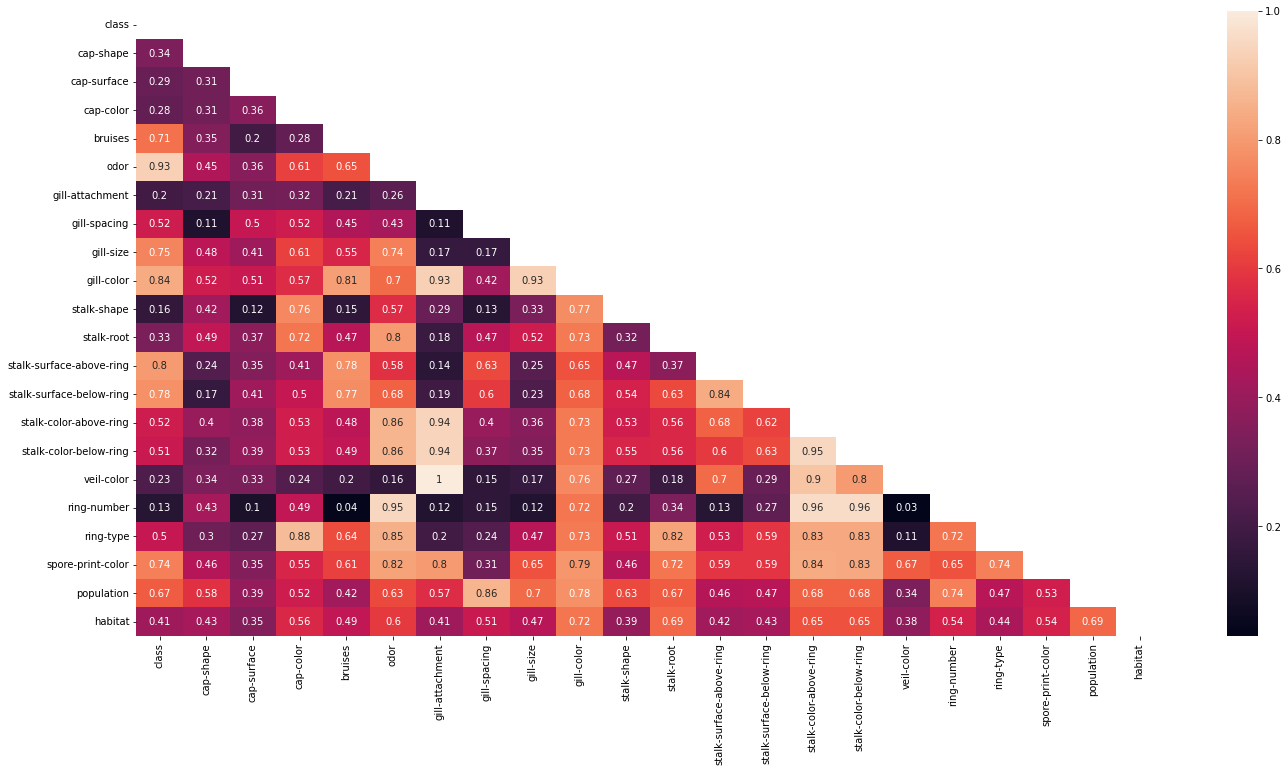

In [56]:
dgnom.df_corrphik(df,col=False)

# Data export
## Save and import data

In [37]:
df.to_csv('mushrooms_clean.csv',index = False)

In [13]:
# Check export
#dfny = pd.read_csv("wine_cleaned.csv")
#dfny.info()